<a href="https://colab.research.google.com/github/angelsmreyes/Hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/blob/main/Nonlinear_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [7]:
moon = make_moons()

In [13]:
X = moon[0]

In [16]:
y = moon[1]

In [20]:
polynomial_svm_clf = Pipeline([
                               ('poly_features', PolynomialFeatures(degree=3)),
                               ('scaler', StandardScaler()),
                               ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [22]:
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

**Train split the data**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# dimensions

print('Train dimension: ', X_train.shape, y_train.shape)
print('--------------')
print('Test dimension: ', X_test.shape, y_test.shape)

Train dimension:  (80, 2) (80,)
--------------
Test dimension:  (20, 2) (20,)


In [34]:
polynomial_svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [37]:
y_pred = polynomial_svm_clf.predict(X_test)

**Model evaluation**

In [40]:
accuracy_score(y_test, y_pred)

1.0

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [45]:
confusion_matrix(y_test, y_pred)

array([[12,  0],
       [ 0,  8]])

Text(0, 0.5, 'x2')

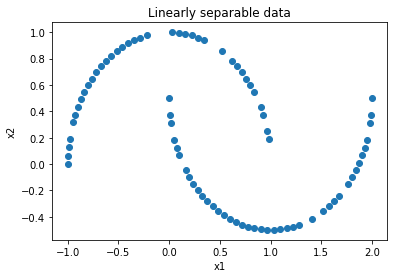

In [48]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('x1')
plt.ylabel('x2')

In [57]:
clf = SVC(kernel='linear')

In [58]:
clf = clf.fit(X_train, y_train)

In [62]:
# support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[ 5  6 14 28 33 36 40 41 47 55 57 59 73 15 17 20 34 43 46 48 56 63 64 65
 75]


In [64]:
# number of support vector per class
support_vector_per_class = clf.n_support_
print(support_vector_per_class)

[13 12]


In [65]:
#support vectors 
support_vectors = clf.support_vectors_

Text(0, 0.5, 'x2')

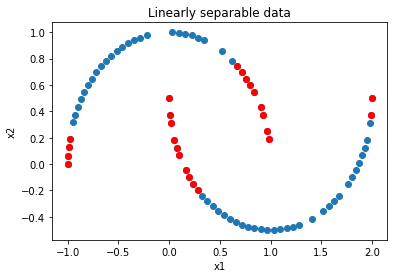

In [68]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], c='red')
plt.title('Linearly separable data')
plt.xlabel('x1')
plt.ylabel('x2')

I still have to learn how to use support_, n_support and support_vectors_ with the pipeline. 